In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("combined_eeg_data.csv")
df = df.drop('file_name', axis=1)
df.head()

,channel0,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,channel9,channel10,channel11,channel12,channel13,channel14,channel15,label
0,-30.06,259.96,39.79,-210.44,79.58,9.73,-90.19,-150.32,-150.32,99.92,-110.53,59.24,-10.61,9.73,379.33,0.00,0
1,-70.74,259.96,39.79,-250.23,99.92,-20.34,-10.61,-150.32,-210.44,179.50,-30.06,149.43,9.73,-70.74,439.46,9.73,0
2,-90.19,219.29,79.58,-110.53,39.79,59.24,119.37,-70.74,-90.19,199.83,119.37,159.16,39.79,-10.61,439.46,-20.34,0
3,29.18,269.69,129.98,-20.34,39.79,99.92,179.50,-10.61,0.00,179.50,209.56,109.64,89.31,19.45,359.88,19.45,0
4,229.90,419.12,159.16,119.37,59.24,219.29,219.29,39.79,199.83,79.58,239.62,-70.74,79.58,79.58,59.24,-50.40,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X = df.drop(['label'], axis=1)  # EEG channels are the features
y = df['label']  # Target labels (0 for healthy, 1 for schizophrenic)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(np.unique(y))

[0 1]


In [9]:
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Input
from tensorflow.keras.utils import plot_model

In [12]:
CNN_model = Sequential()

In [13]:
# Input layer using Input() to define the input shape
CNN_model.add(Input(shape=(X_train.shape[1], 1)))

In [14]:
# Add a Conv1D layer
CNN_model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))

In [15]:
# Flatten the output of the Conv1D layer before feeding into Dense layers
CNN_model.add(Flatten())

In [16]:
# Adding a Dense layer for further learning
CNN_model.add(Dense(64, activation='relu'))

In [17]:
# Output layer for binary classification (healthy = 0, schizophrenia = 1)
CNN_model.add(Dense(1, activation='sigmoid'))

In [18]:
CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
CNN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 15, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        61,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,761 (241.25 KB)

 Trainable params: 61,761 (241.25 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Training the model
history = CNN_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
15744/15744 ━━━━━━━━━━━━━━━━━━━━ 100s 6ms/step - accuracy: 0.6447 - loss: 0.6217 - val_accuracy: 0.6824 - val_loss: 0.5842
Epoch 2/20
15744/15744 ━━━━━━━━━━━━━━━━━━━━ 104s 7ms/step - accuracy: 0.6863 - loss: 0.5792 - val_accuracy: 0.6906 - val_loss: 0.5743
Epoch 3/20
15744/15744 ━━━━━━━━━━━━━━━━━━━━ 89s 6ms/step - accuracy: 0.6945 - loss: 0.5693 - val_accuracy: 0.6946 - val_loss: 0.5708
Epoch 4/20
15744/15744 ━━━━━━━━━━━━━━━━━━━━ 99s 6ms/step - accuracy: 0.6999 - loss: 0.5626 - val_accuracy: 0.6998 - val_loss: 0.5628
Epoch 5/20
15744/15744 ━━━━━━━━━━━━━━━━━━━━ 107s 7ms/step - accuracy: 0.7042 - loss: 0.5569 - val_accuracy: 0.7036 - val_loss: 0.5584
Epoch 6/20
15744/15744 ━━━━━━━━━━━━━━━━━━━━ 91s 6ms/step - accuracy: 0.7081 - loss: 0.5532 - val_accuracy: 0.7027 - val_loss: 0.5613
Epoch 7/20
15744/15744 ━━━━━━━━━━━━━━━━━━━━ 89s 6ms/step - accuracy: 0.7109 - loss: 0.5500 - val_accuracy: 0.7073 - val_loss: 0.5557
Epoch 8/20
15744/15744 ━━━━━━━━━━━━━━━━━━━━ 88s 6ms/step - accurac

In [21]:
# Evaluating the model
y_pred_cnn = (CNN_model.predict(X_test) > 0.5).astype(int)


3936/3936 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)
class_report_cnn = classification_report(y_test, y_pred_cnn)

In [24]:
print(f"Accuracy: {accuracy_cnn:.4f}")
print("Confusion Matrix:")
print(conf_matrix_cnn)
print("Classification Report:")
print(class_report_cnn)

Accuracy: 0.7159
Confusion Matrix:
[[38428 19845]
 [15935 51744]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.66      0.68     58273
           1       0.72      0.76      0.74     67679

    accuracy                           0.72    125952
   macro avg       0.71      0.71      0.71    125952
weighted avg       0.72      0.72      0.71    125952



In [25]:
import seaborn as sns

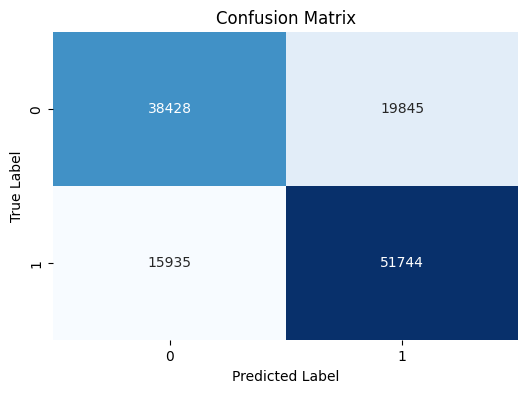

In [26]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_cnn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [27]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

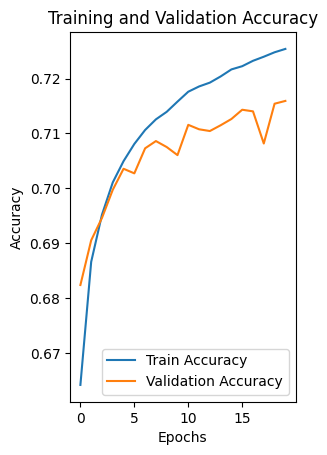

In [28]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

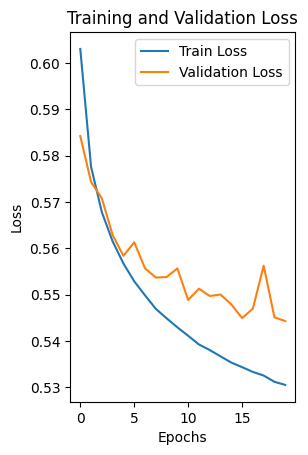

In [29]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [30]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(CNN_model, f)